<center><h1> HEART</h1></center>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
import warnings 
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV 

In [3]:
heart_df=pd.read_csv("heart.csv")

In [4]:
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
heart_df.shape

(303, 14)

In [6]:
heart_df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [8]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
heart_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


<AxesSubplot:xlabel='target', ylabel='count'>

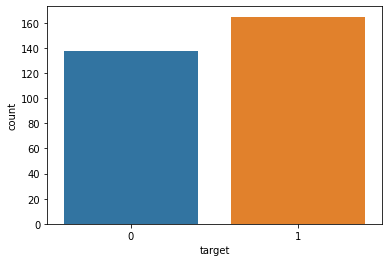

In [10]:
sns.countplot(data=heart_df,x='target',label='Count')

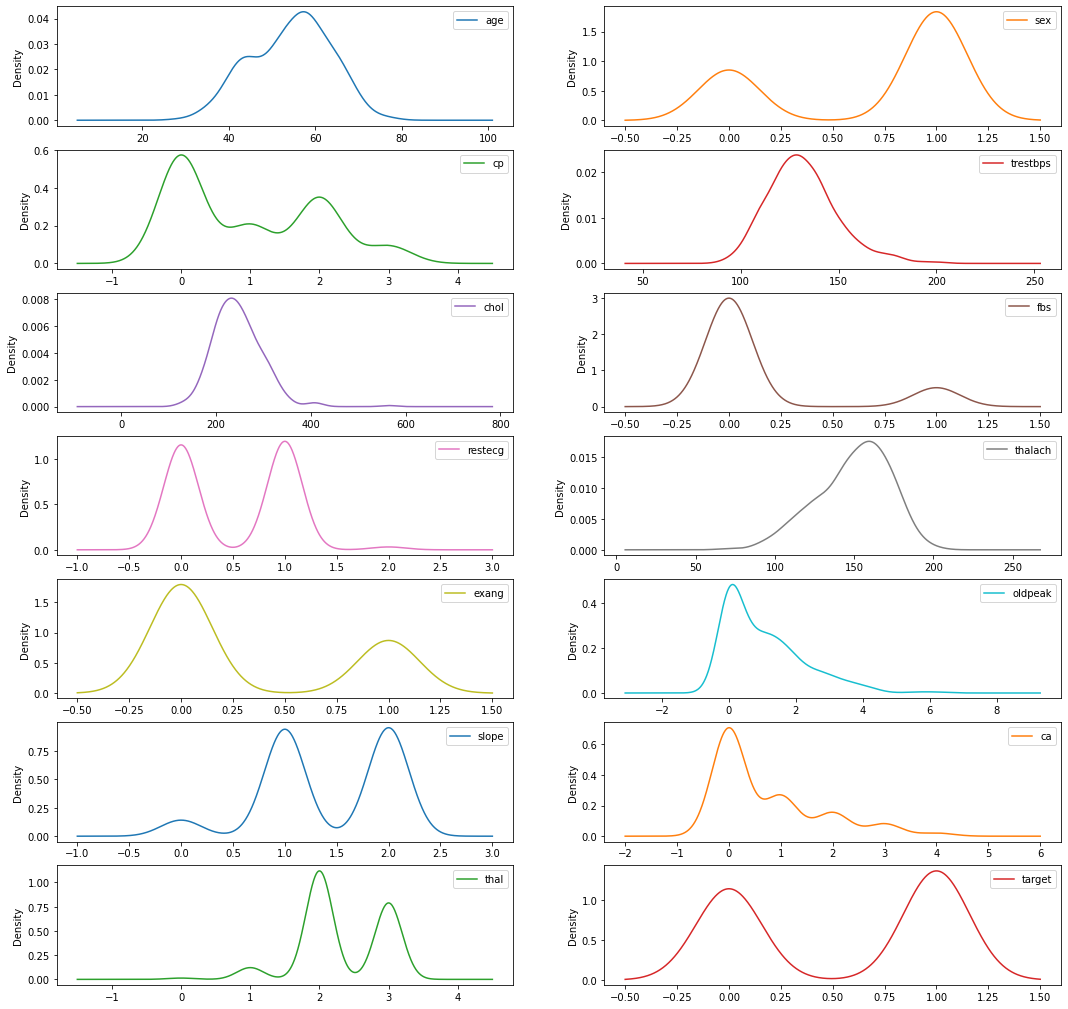

In [11]:
heart_df.plot(kind='density', subplots=True, layout=(7,2), sharex=False , figsize =(18,18))
plt.show()

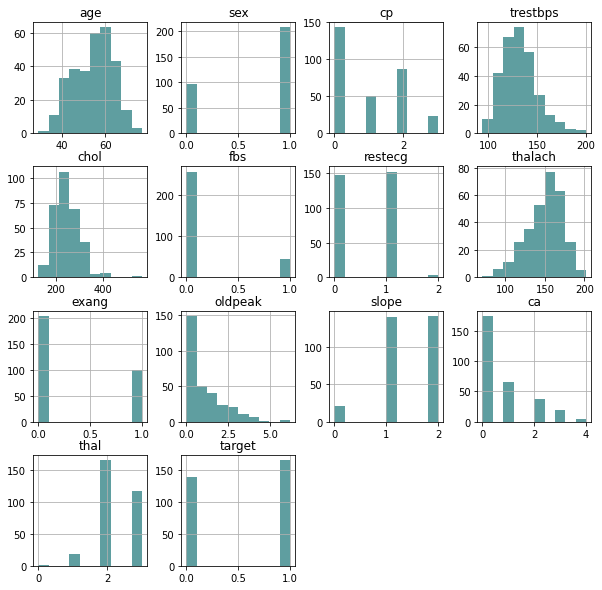

In [12]:
heart_df.hist(figsize = (10,10), color = "#5F9EA0")
plt.show() 

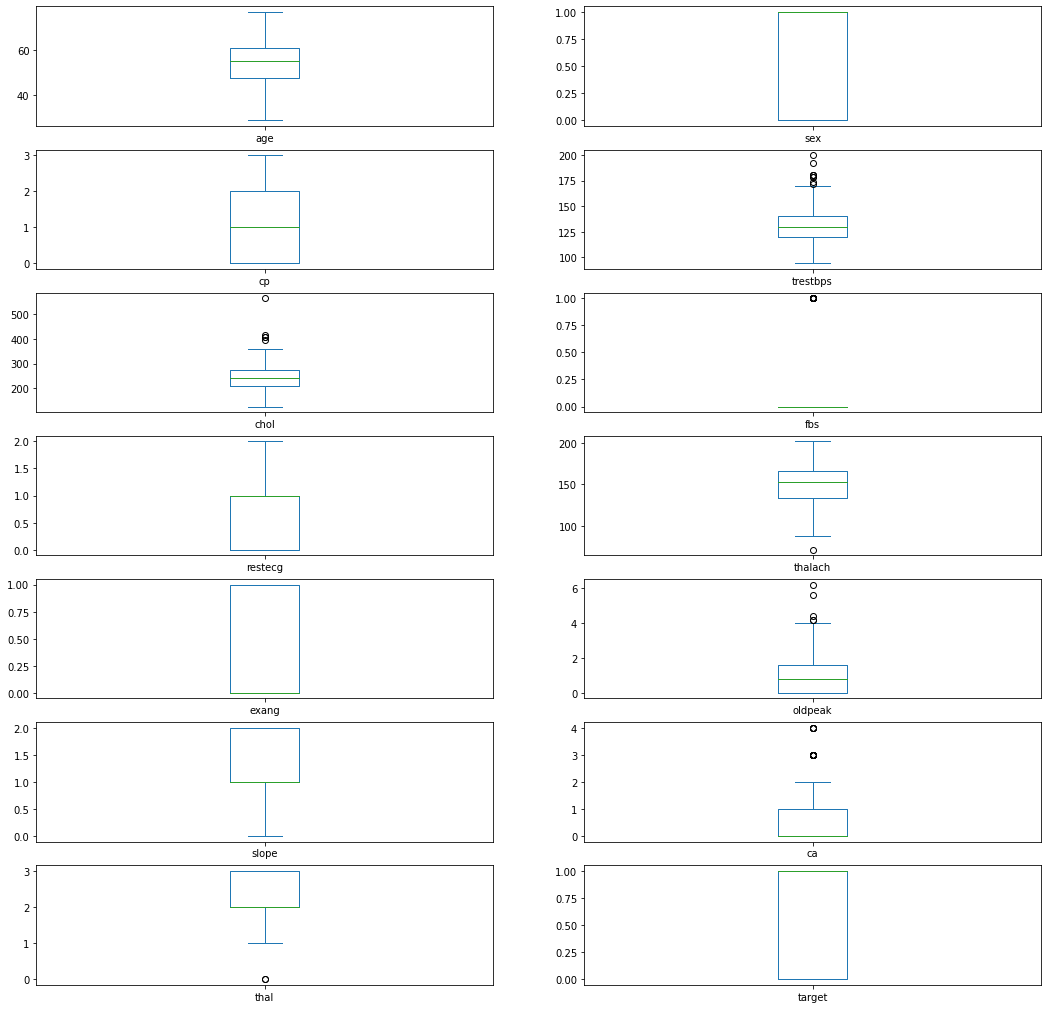

In [13]:
heart_df.plot(kind='box', subplots=True, layout=(7,2), sharex=False,sharey=False ,figsize =(18,18))
plt.show()

In [16]:
b = heart_df.target
list = ['target']
a = heart_df.drop(list,axis = 1 )
a.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


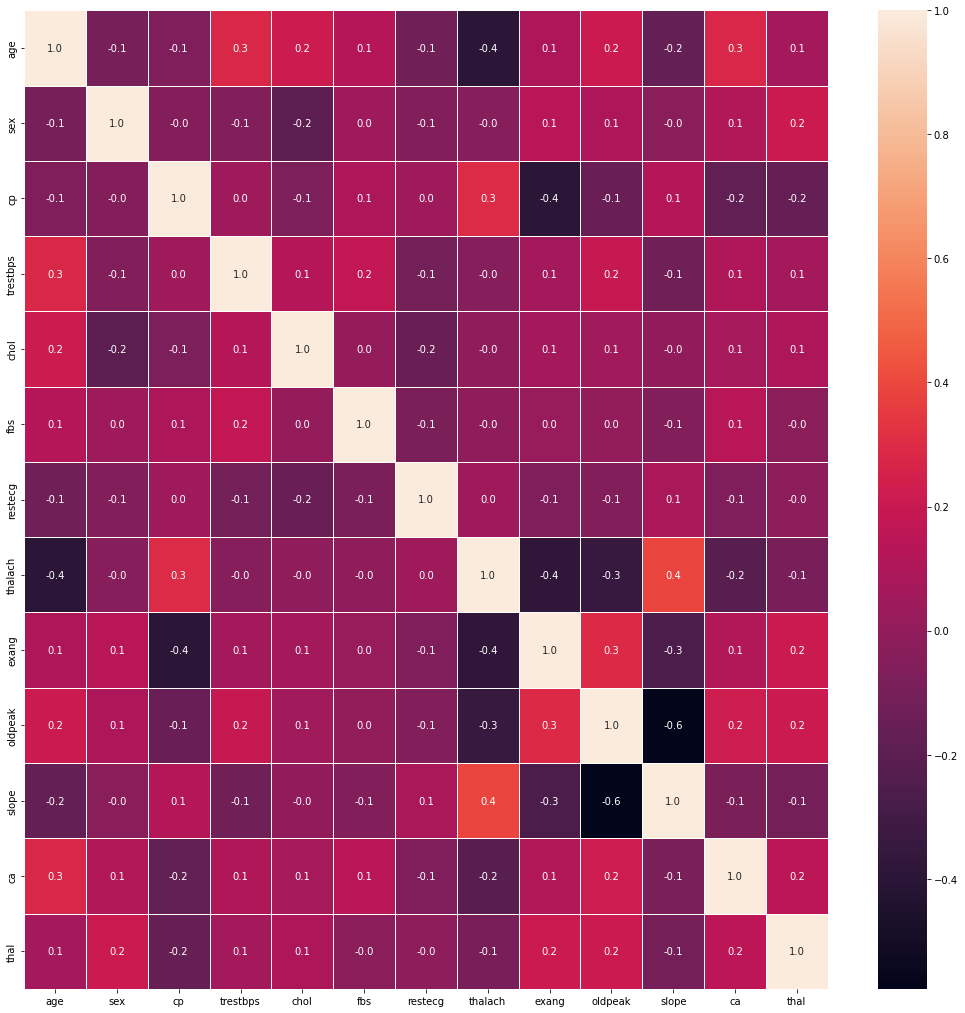

In [17]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(a.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

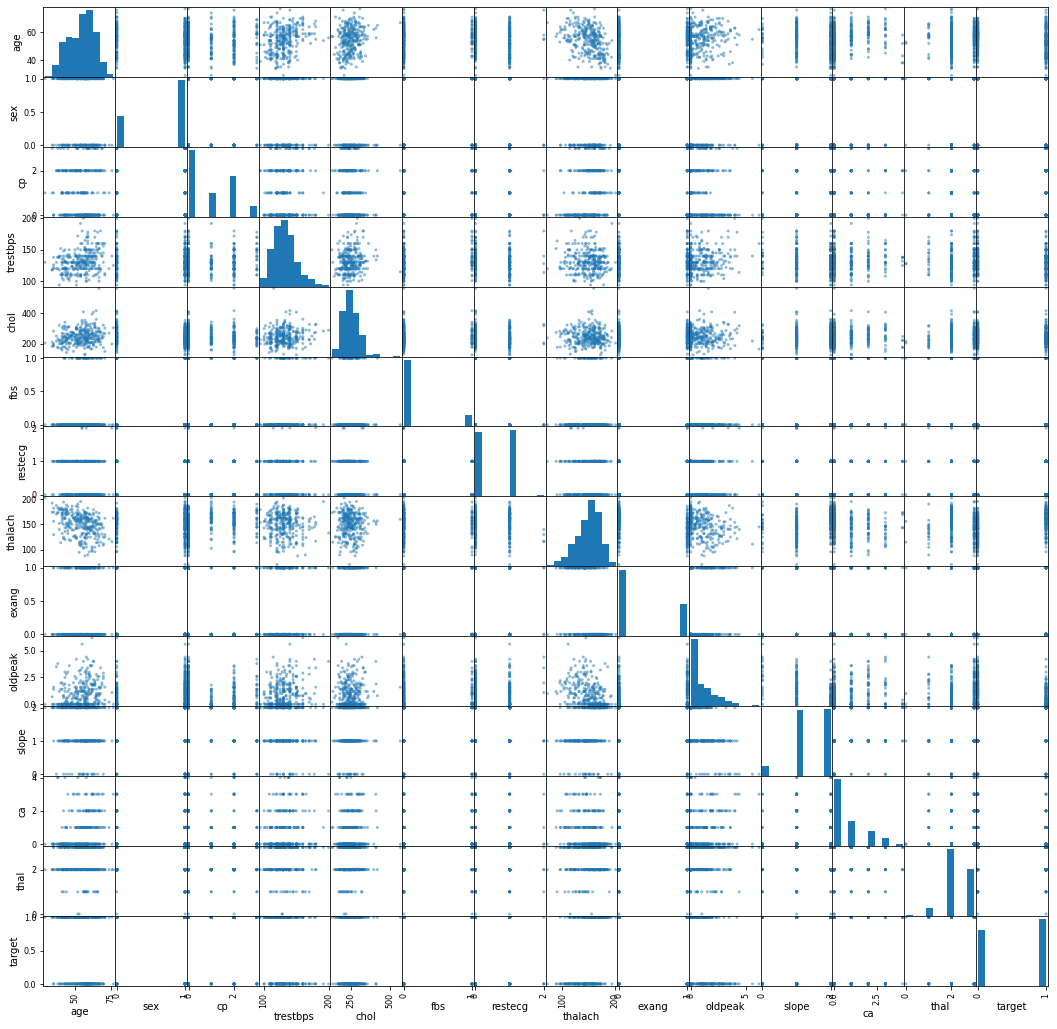

In [18]:
from matplotlib import pyplot
from pandas.plotting import scatter_matrix

scatter_matrix(heart_df ,figsize = (18,18))
pyplot.show()

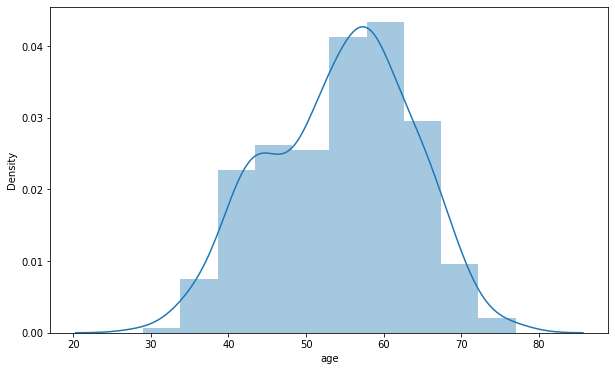

In [19]:
f, ax = plt.subplots(figsize=(10,6))
x = heart_df['age']
ax = sns.distplot(x, bins=10)
plt.show()

In [21]:
categorical_val = []
continous_val = []
for column in heart_df.columns:
    if len(heart_df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

categorical_val.remove('target')
dataset = pd.get_dummies(heart_df, columns = categorical_val)
cols = ['cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang']       
X = heart_df[cols]
y = dataset.target

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

(203, 7)
(203,)
(100, 7)
(100,)


In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
    
def evaluating_model(A,y_test, y_pred):
    print(A," Accuracy Score:- ", accuracy_score(y_test, y_pred)) 
    print(A," Precision Score:- ", precision_score(y_test, y_pred)) 
    print(A," Recall Score:- ", recall_score(y_test, y_pred)) 
    print(A," Confusion Matrix:- \n", confusion_matrix(y_test, y_pred))
    print(A,'Classification Report: \n', classification_report(y_test,y_pred))

### Model Selection

### 1. Logistic Regression

In [26]:
LR=LogisticRegression()
LR.fit(X_train, y_train)
y_predLR=LR.predict(X_test)
evaluating_model("Logistic Regrestion",y_test,y_predLR)
LR_TRAIN_SCORE = round(LR.score(X_train, y_train) * 100, 2)
LR_TEST_SCORE = round(LR.score(X_test, y_test) * 100, 2)
print(LR_TRAIN_SCORE)
print(LR_TEST_SCORE)

Logistic Regrestion  Accuracy Score:-  0.78
Logistic Regrestion  Precision Score:-  0.8214285714285714
Logistic Regrestion  Recall Score:-  0.7931034482758621
Logistic Regrestion  Confusion Matrix:- 
 [[32 10]
 [12 46]]
Logistic Regrestion Classification Report: 
               precision    recall  f1-score   support

           0       0.73      0.76      0.74        42
           1       0.82      0.79      0.81        58

    accuracy                           0.78       100
   macro avg       0.77      0.78      0.78       100
weighted avg       0.78      0.78      0.78       100

74.88
78.0


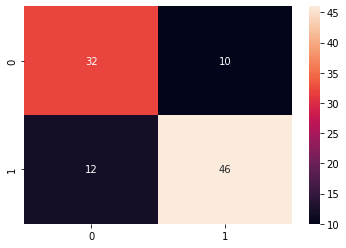

In [27]:
sns.heatmap(confusion_matrix(y_test,y_predLR),annot=True,fmt='d')
plt.show()

In [28]:
### 2. Gaussian Naive Bayes
GNB=GaussianNB()
GNB.fit(X_train,y_train)
y_predGNB=GNB.predict(X_test)
evaluating_model("Gaussian Naive Bayes",y_test,y_predGNB)
GNB_TRAIN_SCORE = round(GNB.score(X_train, y_train) * 100, 2)
GNB_TEST_SCORE = round(GNB.score(X_test, y_test) * 100, 2)
print(GNB_TRAIN_SCORE)
print(GNB_TEST_SCORE)

Gaussian Naive Bayes  Accuracy Score:-  0.77
Gaussian Naive Bayes  Precision Score:-  0.7966101694915254
Gaussian Naive Bayes  Recall Score:-  0.8103448275862069
Gaussian Naive Bayes  Confusion Matrix:- 
 [[30 12]
 [11 47]]
Gaussian Naive Bayes Classification Report: 
               precision    recall  f1-score   support

           0       0.73      0.71      0.72        42
           1       0.80      0.81      0.80        58

    accuracy                           0.77       100
   macro avg       0.76      0.76      0.76       100
weighted avg       0.77      0.77      0.77       100

75.37
77.0


In [46]:
### 3. Random Forest
RFC=RandomForestClassifier(n_estimators=100)
RFC.fit(X_train,y_train)
y_predRFC=RFC.predict(X_test)
evaluating_model("Random Forest",y_test,y_predRFC)
RFC_TRAIN_SCORE = round(RFC.score(X_train, y_train) * 100, 2)
RFC_TEST_SCORE = round(RFC.score(X_test, y_test) * 100, 2)
print(RFC_TRAIN_SCORE)
print(RFC_TEST_SCORE)

Random Forest  Accuracy Score:-  0.78
Random Forest  Precision Score:-  0.8
Random Forest  Recall Score:-  0.8275862068965517
Random Forest  Confusion Matrix:- 
 [[30 12]
 [10 48]]
Random Forest Classification Report: 
               precision    recall  f1-score   support

           0       0.75      0.71      0.73        42
           1       0.80      0.83      0.81        58

    accuracy                           0.78       100
   macro avg       0.78      0.77      0.77       100
weighted avg       0.78      0.78      0.78       100

100.0
78.0


In [31]:
## 4.Support Vector Machine
from sklearn.svm import SVC 
from sklearn.model_selection import GridSearchCV 

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose =3) 
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.537 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.537 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.512 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.525 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.525 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.537 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.537 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.512 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.525 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.525 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.537 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 5/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.575 total time=   0.0s
[CV 1/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.537 total time=   0.0s
[CV 2/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.537 total time=   0.0s
[CV 3/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.585 total time=   0.0s
[CV 4/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.575 total time=   0.0s
[CV 5/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.625 total time=   0.0s
[CV 1/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.634 total time=   0.0s
[CV 2/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.707 total time=   0.0s
[CV 3/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.585 total time=   0.0s
[CV 4/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.800 total time=   0.0s
[CV 5/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.750 total time=   0.0s


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [32]:
grid.best_estimator_

SVC(C=1000, gamma=0.0001)

In [35]:
svc=SVC(C=1000, gamma=0.0001)
svc.fit(X_train,y_train)
y_predSVC=svc.predict(X_test)
evaluating_model("Support VVector Machine",y_test,y_predSVC)
SVC_TRAIN_SCORE = round(svc.score(X_train, y_train) * 100, 2)
SVC_TEST_SCORE = round(svc.score(X_test, y_test) * 100, 2)
print(SVC_TRAIN_SCORE)
print(SVC_TEST_SCORE)

Support VVector Machine  Accuracy Score:-  0.68
Support VVector Machine  Precision Score:-  0.76
Support VVector Machine  Recall Score:-  0.6551724137931034
Support VVector Machine  Confusion Matrix:- 
 [[30 12]
 [20 38]]
Support VVector Machine Classification Report: 
               precision    recall  f1-score   support

           0       0.60      0.71      0.65        42
           1       0.76      0.66      0.70        58

    accuracy                           0.68       100
   macro avg       0.68      0.68      0.68       100
weighted avg       0.69      0.68      0.68       100

83.25
68.0


In [36]:
## 5.Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV 

def randomized_search(params, runs=20, clf=DecisionTreeClassifier(random_state=2)): 
    rand_clf = RandomizedSearchCV(clf, params, n_iter=runs, cv=5, n_jobs=-1, random_state=2) 
    rand_clf.fit(X_train, y_train) 
    best_model = rand_clf.best_estimator_
    best_score = rand_clf.best_score_

    print("Training score: {:.3f}".format(best_score))
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print('Test score: {:.3f}'.format(accuracy))
    
    return best_model

randomized_search(params={'criterion':['entropy', 'gini'],
                              'splitter':['random', 'best'],
                          'min_weight_fraction_leaf':[0.0, 0.0025, 0.005, 0.0075, 0.01],
                          'min_samples_split':[2, 3, 4, 5, 6, 8, 10],
                          'min_samples_leaf':[1, 0.01, 0.02, 0.03, 0.04],
                          'min_impurity_decrease':[0.0, 0.0005, 0.005, 0.05, 0.10, 0.15, 0.2],
                          'max_leaf_nodes':[10, 15, 20, 25, 30, 35, 40, 45, 50, None],
                          'max_features':['auto', 0.95, 0.90, 0.85, 0.80, 0.75, 0.70],
                          'max_depth':[None, 2,4,6,8],
                          'min_weight_fraction_leaf':[0.0, 0.0025, 0.005, 0.0075, 0.01, 0.05]
                         })

Training score: 0.715
Test score: 0.750


DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features=0.75,
                       max_leaf_nodes=25, min_impurity_decrease=0.0005,
                       min_samples_split=5, min_weight_fraction_leaf=0.0075,
                       random_state=2)

In [37]:
DTC=DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features=0.75,
                       max_leaf_nodes=25, min_impurity_decrease=0.0005,
                       min_samples_split=5, min_weight_fraction_leaf=0.0075,
                       random_state=2)
DTC.fit(X_train,y_train)
y_predDTC=DTC.predict(X_test)
evaluating_model("DecisionTreeClassifier",y_test,y_predDTC)
DTC_TRAIN_SCORE = round(DTC.score(X_train, y_train) * 100, 2)
DTC_TEST_SCORE = round(DTC.score(X_test, y_test) * 100, 2)
print(DTC_TRAIN_SCORE)
print(DTC_TEST_SCORE)

DecisionTreeClassifier  Accuracy Score:-  0.75
DecisionTreeClassifier  Precision Score:-  0.8235294117647058
DecisionTreeClassifier  Recall Score:-  0.7241379310344828
DecisionTreeClassifier  Confusion Matrix:- 
 [[33  9]
 [16 42]]
DecisionTreeClassifier Classification Report: 
               precision    recall  f1-score   support

           0       0.67      0.79      0.73        42
           1       0.82      0.72      0.77        58

    accuracy                           0.75       100
   macro avg       0.75      0.75      0.75       100
weighted avg       0.76      0.75      0.75       100

79.31
75.0


In [38]:
###XGboostt
from xgboost import XGBClassifier
xgb1 = XGBClassifier(colsample_bytree= 1.0,
 learning_rate = 0.1,
 max_depth = 4,
 n_estimators= 400,
 subsample= 1.0)  

eval_set  = [(X_test, y_test)]

xgb1.fit(X_train, y_train,early_stopping_rounds=10, eval_metric="logloss",eval_set=eval_set, verbose=True)

[0]	validation_0-logloss:0.66248
[1]	validation_0-logloss:0.63479
[2]	validation_0-logloss:0.61074
[3]	validation_0-logloss:0.59013
[4]	validation_0-logloss:0.57426
[5]	validation_0-logloss:0.55972
[6]	validation_0-logloss:0.54603
[7]	validation_0-logloss:0.53848
[8]	validation_0-logloss:0.53192
[9]	validation_0-logloss:0.52435
[10]	validation_0-logloss:0.51522
[11]	validation_0-logloss:0.50978
[12]	validation_0-logloss:0.50483
[13]	validation_0-logloss:0.50145
[14]	validation_0-logloss:0.49858
[15]	validation_0-logloss:0.49556
[16]	validation_0-logloss:0.49323
[17]	validation_0-logloss:0.48750
[18]	validation_0-logloss:0.48713
[19]	validation_0-logloss:0.48702
[20]	validation_0-logloss:0.48832
[21]	validation_0-logloss:0.48563
[22]	validation_0-logloss:0.48677
[23]	validation_0-logloss:0.48852
[24]	validation_0-logloss:0.48927
[25]	validation_0-logloss:0.49144
[26]	validation_0-logloss:0.49050
[27]	validation_0-logloss:0.49164
[28]	validation_0-logloss:0.49268
[29]	validation_0-loglos

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1.0,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=400, n_jobs=4, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1.0, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [39]:
y_predXGB1=xgb1.predict(X_test)
evaluating_model("XGBOOST",y_test,y_predXGB1)
XGB1_TRAIN_SCORE = round(xgb1.score(X_train, y_train) * 100, 2)
XGB1_TEST_SCORE = round(xgb1.score(X_test, y_test) * 100, 2)
print(XGB1_TRAIN_SCORE)
print(XGB1_TEST_SCORE)

XGBOOST  Accuracy Score:-  0.76
XGBOOST  Precision Score:-  0.8035714285714286
XGBOOST  Recall Score:-  0.7758620689655172
XGBOOST  Confusion Matrix:- 
 [[31 11]
 [13 45]]
XGBOOST Classification Report: 
               precision    recall  f1-score   support

           0       0.70      0.74      0.72        42
           1       0.80      0.78      0.79        58

    accuracy                           0.76       100
   macro avg       0.75      0.76      0.76       100
weighted avg       0.76      0.76      0.76       100

83.74
76.0


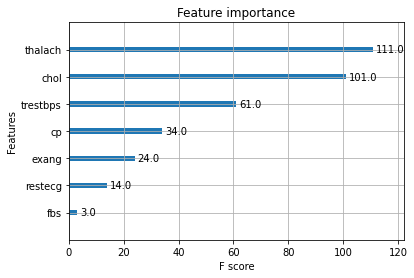

In [40]:
from xgboost import plot_importance
plot_importance(xgb1)
plt.show()

In [41]:
####GBDT
from sklearn.ensemble import GradientBoostingClassifier

GBDT = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1,max_depth=1,random_state=0) 
GBDT.fit(X_train, y_train) 

y_predGBDT = GBDT.predict(X_test) 
evaluating_model("GradientBoostingClassifier",y_test, y_predGBDT)
GBDT_TRAIN_SCORE = round(GBDT.score(X_train, y_train) * 100, 2)
GBDT_TEST_SCORE = round(GBDT.score(X_test, y_test) * 100, 2)
print(GBDT_TRAIN_SCORE)
print(GBDT_TEST_SCORE)

GradientBoostingClassifier  Accuracy Score:-  0.77
GradientBoostingClassifier  Precision Score:-  0.8301886792452831
GradientBoostingClassifier  Recall Score:-  0.7586206896551724
GradientBoostingClassifier  Confusion Matrix:- 
 [[33  9]
 [14 44]]
GradientBoostingClassifier Classification Report: 
               precision    recall  f1-score   support

           0       0.70      0.79      0.74        42
           1       0.83      0.76      0.79        58

    accuracy                           0.77       100
   macro avg       0.77      0.77      0.77       100
weighted avg       0.78      0.77      0.77       100

78.33
77.0


In [47]:
# Comparing all the models
models = pd.DataFrame({
    'Model': [ "Logistic Regrestion", 'Gaussian Naive Bayes','Random Forest',"Support Vector Machine","DecisionTreeClassifier","XGBOOST","GradientBoostingClassifier"],
    'Score': [ LR_TRAIN_SCORE, GNB_TRAIN_SCORE, RFC_TRAIN_SCORE,SVC_TRAIN_SCORE,DTC_TRAIN_SCORE,XGB1_TRAIN_SCORE,GBDT_TRAIN_SCORE],
    'Test Score': [ LR_TEST_SCORE, GNB_TEST_SCORE, RFC_TEST_SCORE,SVC_TEST_SCORE,DTC_TEST_SCORE,XGB1_TEST_SCORE,GBDT_TEST_SCORE]})
models.sort_values(by='Test Score', ascending=False)

,Model,Score,Test Score
0,Logistic Regrestion,74.88,78.0
2,Random Forest,100.00,78.0
1,Gaussian Naive Bayes,75.37,77.0
6,GradientBoostingClassifier,78.33,77.0
5,XGBOOST,83.74,76.0
4,DecisionTreeClassifier,79.31,75.0
3,Support Vector Machine,83.25,68.0


## Conclusion

### From the Models (Logistic Regression, Gaussian Naive Bayes, Random Forest,GBDT,Decisio Tree,XGboost,SVM)  Random Forest performs the best on this dataset

In [53]:
import joblib 
joblib.dump(RFC, 'HeartRFC.pkl') 
model = joblib.load('HeartRFC.pkl' ) 
model.predict([[2,150,232,0,0,165,0],
              [2,94,227,0,1,154,1],
              [2,140,233,0,1,163,0]])

array([1, 1, 0], dtype=int64)

In [49]:
X_train

,cp,trestbps,chol,fbs,restecg,thalach,exang
37,2,150,232,0,0,165,0
16,2,120,340,0,1,172,0
126,0,112,204,0,1,143,0
291,0,114,318,0,2,140,0
273,0,100,234,0,1,156,0
...,...,...,...,...,...,...,...
188,2,140,233,0,1,163,0
71,2,94,227,0,1,154,1
106,3,160,234,1,0,131,0
270,0,120,249,0,0,144,0


In [50]:

|

37     1
16     1
126    1
291    0
273    0
      ..
188    0
71     1
106    1
270    0
102    1
Name: target, Length: 203, dtype: int64